<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<br>
<br>
<div align="right">
<b>Corso di Laurea Magistrale in Informatica</b><br>
<b>Curriculum Data Science</b><br>
</div>
</p>

<div align="right">
Matteo Marulli<br>
Matteo Ghera<br>
</div>

# Analisi dei dati del covid19 in Italia
Questa analisi dati è stata svolta prendendo i dati rilasciati dalla protezione civile sul covid19 in Italia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from path import Path
import json

In [2]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f)
json.dumps(d)
df_province =pd.DataFrame(d)

with open(DATA_DIR/'dpc-covid19-ita-regioni.json') as f:
         d= json.load(f)
json.dumps(d)
df_regioni =pd.DataFrame(d)

In [3]:
df_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,


In [4]:
df_regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,


## Descrizione dei dataset
Il dataset **Regioni** è composto da 16 variaibili e molte variabili sono di tipo int64 e float 64.
Le variabili prese in analisi sono:
- *data*: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date
- *stato*: indica lo stato in è stato rilevato il caso (tipo qualitativo e non ordinale)
- *codice_regione*: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- *denominazione_regione*: indica il nome della regione, (tipo qualitativo e non ordinale)
- *lat*: latidudine della regione (tipo quantitativo e ordinale)
- *long*: longitudine della regione (tipo quantitativo e ordinale)
- *ricoverati_con_sintomi*: numero di persone che sono state ricoverate nel giorno indicato da data (tipo quantitativo e ordianale)
- *terapia_intesiva*: numero di persone che sono state ricoverate/spostate in terapia intensiva nel giorno indicato da data (tipo quantitativo e ordianale)
- *totale_ospedalizzati*: numero di persone che sono state ricoverate in ospedale (somma tra quelli in tp.intensiva e ricoverati con sintomi) nel giorno indicato da data (tipo quantitativo e ordianale)
- *isolamento_domiciliare*: numero di persone che sono insolamento_domiciliare nel giorno indicato da data (tipo quantitativo e ordianale)
- *totale_attualmente_positivi*: numero di persone in isolamento e ricoverati in ospedale nel giorno indicato da data (tipo quantitativo e ordianale)
- *nuovi_attualmente_positivi*: differenza di persone positive al Covid19 tra il giorno attuale e il giorno passato (tipo quantitativo e ordianale)
- *dimessi_guariti*: persone guarite dal covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- *deceduti*: persone morte a causa del covid19 nella giornata indicata da data (tipo quantitativo e ordianale)
- *totale_casi*: totale casi positivi nella giornata indicata da data (tipo quantitativo e ordianale)
- *tamponi*: numerod i campioni fatti dalla regione nella giornata indicata da data (tipo quantitativo e ordianale)

Il dataset **Province** è composto da 12 variaibili.
Le variabili prese in analisi sono:
- *data*: è il timestamp indica quando è stato inserito il record nel database, deve essere convertito nel formato date (tipo qualitativo e non ordinale)
- *stato*: indica lo stato, verrà cancellata nel preprocessing (tipo qualitativo e non ordinale)
- *codice_regione*: codice istat per identificare una regione (tipo quantitativo e non ordinale)
- *denominazione_regione*: indica il nome della regione (tipo qualitativo e non ordinale)
- *lat*: latidudine della città (tipo quantitativo e ordinale)
- *long*: longitudine della città (tipo quantitativo e ordinale)
- *codice_provincia*: codice istat per identificare una provincia (tipo quantitativo e non ordinale)
- *denominanzione_provincia*: indica il nome della provincia (tipo qualitativo e non ordinale)
- *sigla_provincia*: sigla della provincia usate per le targe auto (tipo qualitativo e non ordinale)
- *totale_casi*: persone infette da covid19 (tipo quantitativo e ordianale)
- *note_it*: note informative in italiano (tipo qualitativo e non ordinale)
- *note_en*: note informative in inglese (tipo qualitativo e non ordinale)
- *casi_testati*: numero di persone sottoposte al test per covid-19


Le colonne in comune nei due dataset sono:
- *data*
- *stato*
- *note_en*
- *note_it*
- *codice_regione*
- *totale_casi*
- *denominazione_regione*
- *lat*
- *long*

Le colonne candidate per eseguire la *join* sono: *data* e *denominazione_regione*

In [5]:
set(df_regioni.columns).intersection(set(df_province.columns))

{'codice_regione',
 'data',
 'denominazione_regione',
 'lat',
 'long',
 'note_en',
 'note_it',
 'stato',
 'totale_casi'}

In [9]:
joinDF.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 10495
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   data                        10496 non-null  object 
 1   stato_x                     10496 non-null  object 
 2   codice_regione              10496 non-null  int64  
 3   denominazione_regione_x     10496 non-null  object 
 4   codice_provincia            10496 non-null  int64  
 5   denominazione_provincia     10496 non-null  object 
 6   sigla_provincia             10496 non-null  object 
 7   lat_x                       10496 non-null  float64
 8   long_x                      10496 non-null  float64
 9   totale_casi_provincia       10496 non-null  int64  
 10  note_it_x                   10496 non-null  object 
 11  note_en_x                   10496 non-null  object 
 12  stato_y                     10496 non-null  object 
 13  denominazione_regione_y     104

In [10]:
joinDF.describe()

,codice_regione,codice_provincia,lat_x,long_x,totale_casi_provincia,lat_y,long_y,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi_regioni,tamponi,casi_testati
count,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,3840.000000
mean,10.687500,207.523438,35.868843,10.112000,958.071456,42.945741,12.036218,1351.166921,156.793921,1507.960842,3525.129192,5033.090034,61.449409,207.873666,3019.164158,1309.605850,9361.860042,71229.496475,96180.685938
std,6.127524,347.399578,16.072290,5.097835,2048.274448,2.514866,2.610528,2488.958976,260.958626,2742.322356,5716.724056,8033.131626,343.468372,375.870174,6636.474909,3062.891965,17103.445468,105351.765570,78414.535733
min,1.000000,1.000000,0.000000,0.000000,0.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-5339.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,3482.000000
25%,5.750000,32.750000,38.848542,8.583304,20.000000,41.125596,9.190347,91.000000,13.000000,106.000000,216.000000,396.000000,-11.000000,14.000000,19.000000,22.000000,544.000000,4895.750000,35107.000000
50%,10.000000,64.500000,42.609815,11.188560,253.000000,43.769231,12.338452,397.000000,58.000000,443.000000,1343.000000,1942.000000,16.000000,61.000000,381.000000,220.000000,2859.000000,29241.000000,66269.000000
75%,16.000000,96.250000,44.947714,13.593962,966.000000,45.163682,13.518875,1169.000000,184.000000,1389.000000,3906.000000,5427.000000,103.000000,196.000000,2116.000000,874.000000,8723.000000,88384.000000,138830.000000
max,22.000000,999.000000,46.499335,18.171897,22222.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,1950.000000,3251.000000,42403.000000,15543.000000,85019.000000,581437.000000,343213.000000


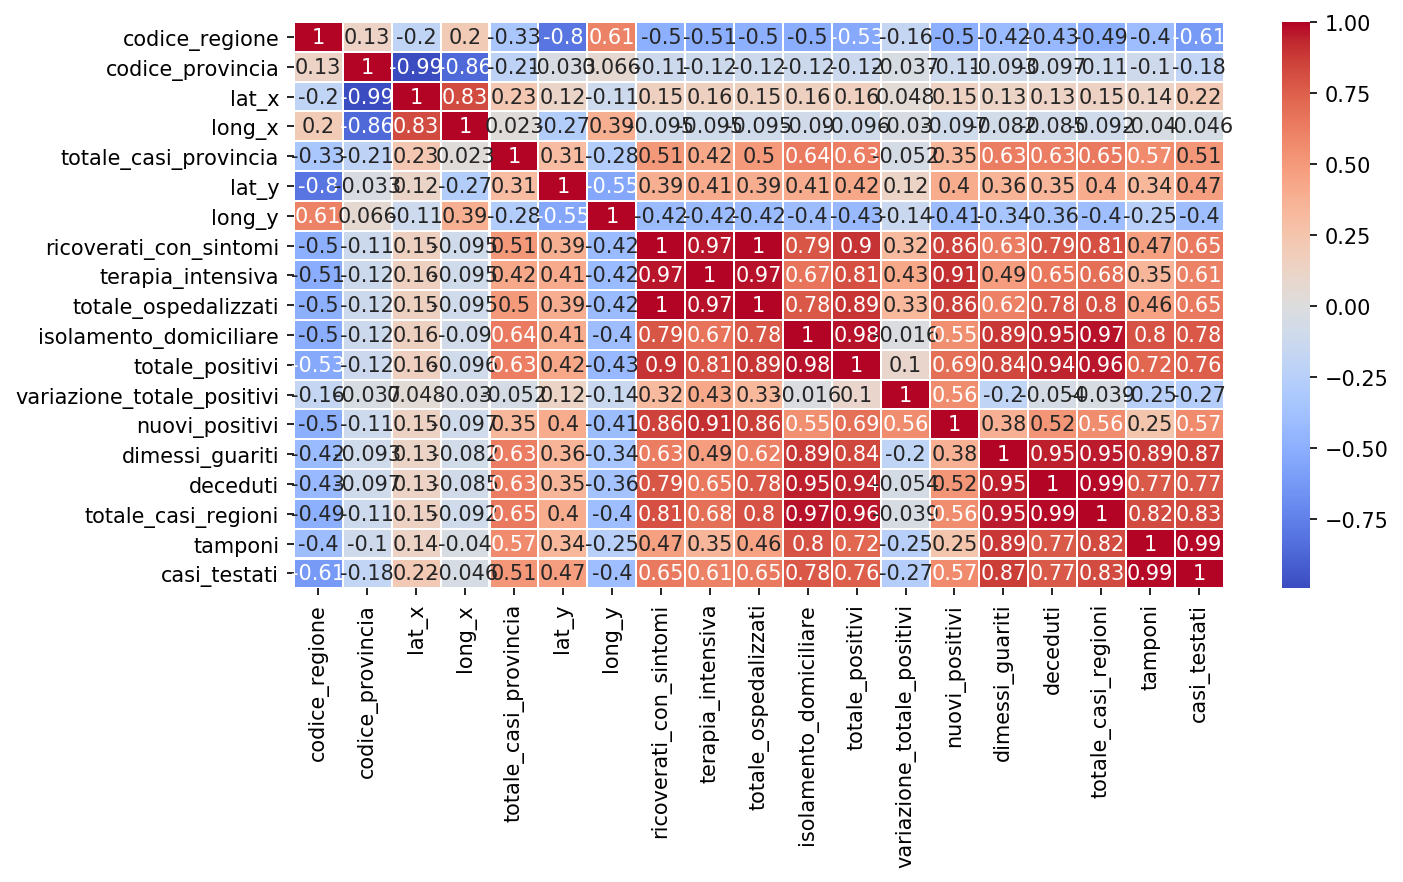

In [11]:
plt.figure(figsize=(10,5), dpi = 150)
sns.heatmap(joinDF.corr(), annot=True, linewidths= 0.5 , cmap = 'coolwarm')

## Data preparation

In [ ]:
joinDF = pd.merge(df_province, df_regioni, on= ['data', 'codice_regione'])

## Data cleaning

In questa sezioni si elimineranno le colonne che riteniamo non necessarie perchè forniscono informazioni ridondanti: *stato, codice_regione, note_en, note_it, codice_regione, codice_provincia* e *sigla_provincia*. Dopo che abbiamo eseguito la *join* sono nate delle colonne, indicate da \_x e da \_y, che abbiamo rimosso rimuovendo il suffisso finale. 

Successivamente abbiamo rinomato le colonne che avevano lo stesso nome ma valori diversi e abbiamo rimpiazzato i valori `NaN` della colonna *casi_testati* con la media dei valori nella colonna.

In [ ]:
joinDF.rename({"totale_casi_x":"totale_casi_provincia", "totale_casi_y":"totale_casi_regioni", "lat_x": "lat_provincia", "lat_y":"lat_regione","long_x":"long_provincia","long_y":"long_regione"}, axis=1, inplace=True)

In [12]:
joinDF.columns = joinDF.columns.str.replace('_x','')
joinDF.columns = joinDF.columns.str.replace('_y','')
joinDF['data'] = pd.to_datetime(joinDF['data'], format='%Y-%m-%d') 
joinDF.drop(columns=['stato', 'codice_regione', 'note_en', 'note_it', 'codice_regione', 'codice_provincia','sigla_provincia'], axis=1, inplace = True)
joinDF['casi_testati'].fillna(joinDF['casi_testati'].mean(), inplace = True)

casi_testati  \
denominazione_regione denominazione_provincia                               
Abruzzo               Chieti                                 72163.922790   
                      In fase di definizione/aggiornamento   72163.922790   
                      L'Aquila                               72163.922790   
                      Pescara                                72163.922790   
                      Teramo                                 72163.922790   
...                                                                   ...   
Veneto                Rovigo                                141418.874009   
                      Treviso                               141418.874009   
                      Venezia                               141418.874009   
                      Verona                                141418.874009   
                      Vicenza                               141418.874009   

                                                              deceduti  \
denominazione_regione denominazione_provincia                            
Abruzzo               Chieti                                172.378049   
                      In fase di definizione/aggiornamento  172.378049   
                      L'Aquila                              172.378049   
                      Pescara                               172.378049   
                      Teramo                                172.378049   
...                                                                ...   
Veneto                Rovigo                                766.365854   
                      Treviso                               766.365854   
                      Venezia                               766.365854   
                      Verona                                766.365854   
                      Vicenza                               766.365854   

                                                            dimessi_guariti  \
denominazione_regione denominazione_provincia                                 
Abruzzo               Chieti                                     346.658537   
                      In fase di definizione/aggiornamento       346.658537   
                      L'Aquila                                   346.658537   
                      Pescara                                    346.658537   
                      Teramo                                     346.658537   
...                                                                     ...   
Veneto                Rovigo                                    3933.756098   
                      Treviso                                   3933.756098   
                      Venezia                                   3933.756098   
                      Verona                                    3933.756098   
                      Vicenza                                   3933.756098   

                                                            isolamento_domiciliare  \
denominazione_regione denominazione_provincia                                        
Abruzzo               Chieti                                            897.353659   
                      In fase di definizione/aggiornamento              897.353659   
                      L'Aquila                                          897.353659   
                      Pescara                                           897.353659   
                      Teramo                                            897.353659   
...                                                                            ...   
Veneto                Rovigo                                           4939.182927   
                      Treviso                                          4939.182927   
                      Venezia                                          4939.182927   
                      Verona                                           4939.182927   
                      Vicenza       

## Data exploration

In questa fase cercheremo di rispondere a queste domande:

- Quali sono state le regioni con più ricoverati?*
- Quali sono state le regioni che hanno avuto più vittime? E quali sono quello con meno vittime?*
- Quali sono state le regioni con più malati?*
- Quanti tamponi sono stati fatti e chi ne ha fatti di più? *
- E’ stata superata la capienza nazionale dei posti letto?
- E’ stata superata la capienza regionale dei posti letto?
- Quanto è costata alla regione curare un malato covid in terapia intensiva?*
- Quanto è costato allo stato curare un malato covid in terapia intensiva?*
- Quanto soldi ha speso ogni regione per fare i tamponi per il covid?*
- Quanto soldi ha speso lo stato per fare i tamponi per il covid?*
- Quali sono state le regioni che hanno gestito meglio l’emergenza sanitaria?
- Quali sono state le regioni che hanno gestito meglio l’emergenza sanitaria?

Le domande precedenti possono essere eseguite anche per le province.

Risorse: <br>
https://it.businessinsider.com/terapia-intensive-coronavirus-quanto-costa-allo-stato-italiano-un-paziente-grave/ <br>
https://www.telemessina.it/2020/03/24/come-si-effettua-e-quanto-costa-un-tampone-per-covid-19/


> *Quali sono state le regioni con più malati?*

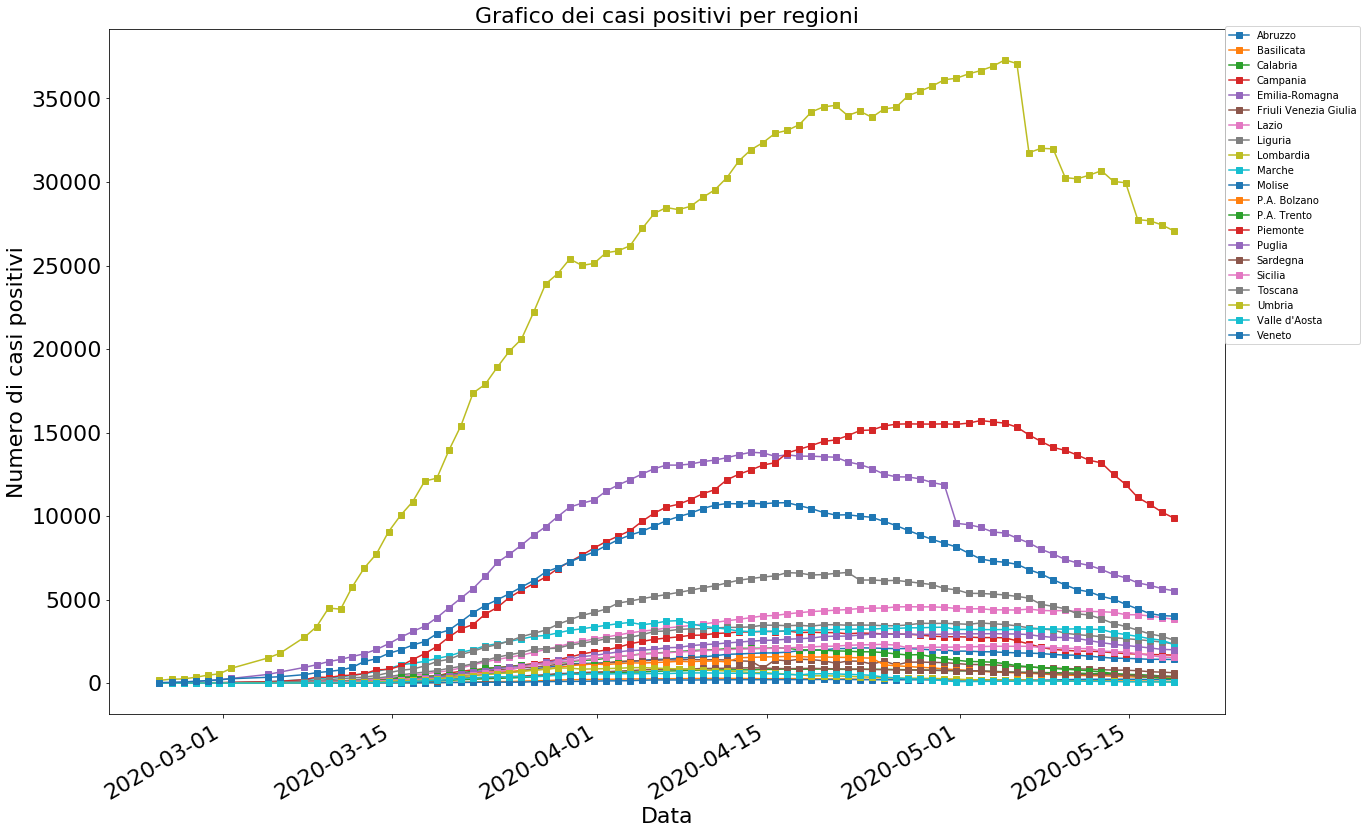

In [15]:
casiPositviPerRegioni = joinDF.pivot_table('totale_positivi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
casiPositviPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei casi positivi per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di casi positivi', size = 22 )
plt.legend(loc=(1,0.54))

> *Quanti tamponi sono stati fatti e chi ne ha fatti di più?*

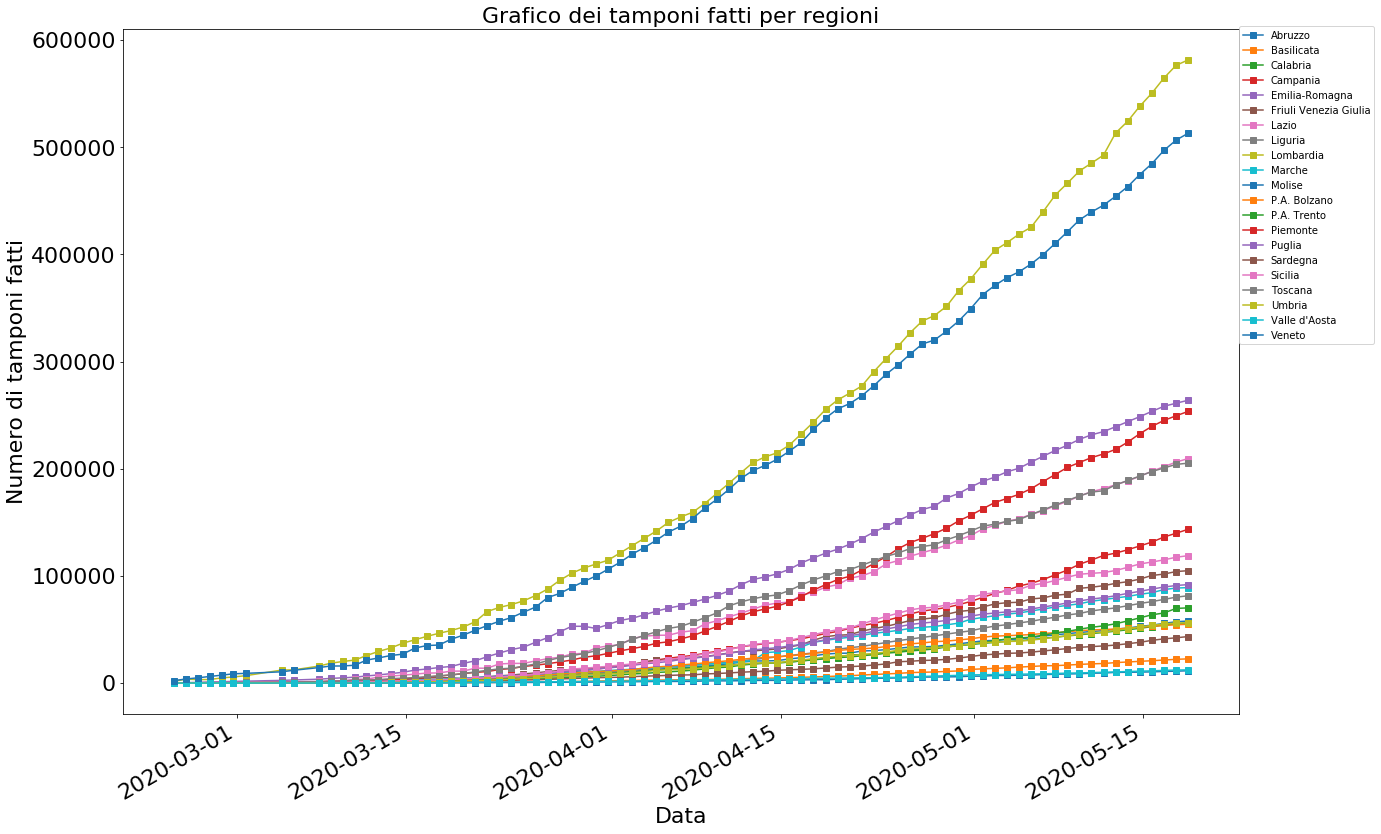

In [16]:
tamponiPerRegioni = joinDF.pivot_table('tamponi', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
tamponiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei tamponi fatti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di tamponi fatti', size = 22 )
plt.legend(loc=(1,0.54))

>*Quanto soldi ha speso ogni regione per fare i tamponi per il covid?*

(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000.]),
 <a list of 9 Text yticklabel objects>)

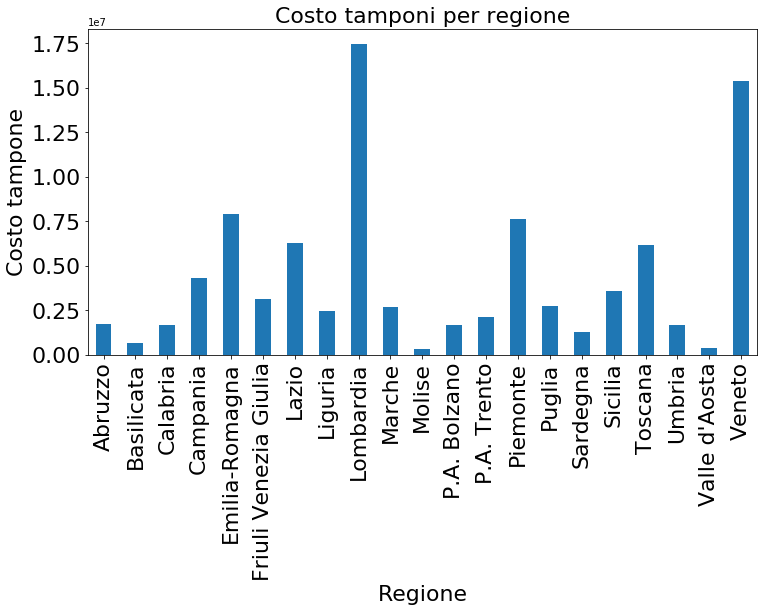

In [52]:
numero_tamponi_regione=np.max(tamponiPerRegioni)
costo_tamponi_regione=numero_tamponi_regione*30
costo_tamponi_regione.plot(kind="bar", figsize=(12,6))
plt.title("Costo tamponi per regione", size=22)
plt.ylabel("Costo tampone", size=22)
plt.xlabel("Regione", size=22)
plt.xticks(size=22)
plt.yticks(size=22)

>*Quanto soldi ha speso lo stato per fare i tamponi per il covid?*

In [40]:
np.sum(costo_tamponi_regione)

91240980

> *Quali sono state le regioni che hanno avuto più vittime? E quali sono quello con meno vittime?*

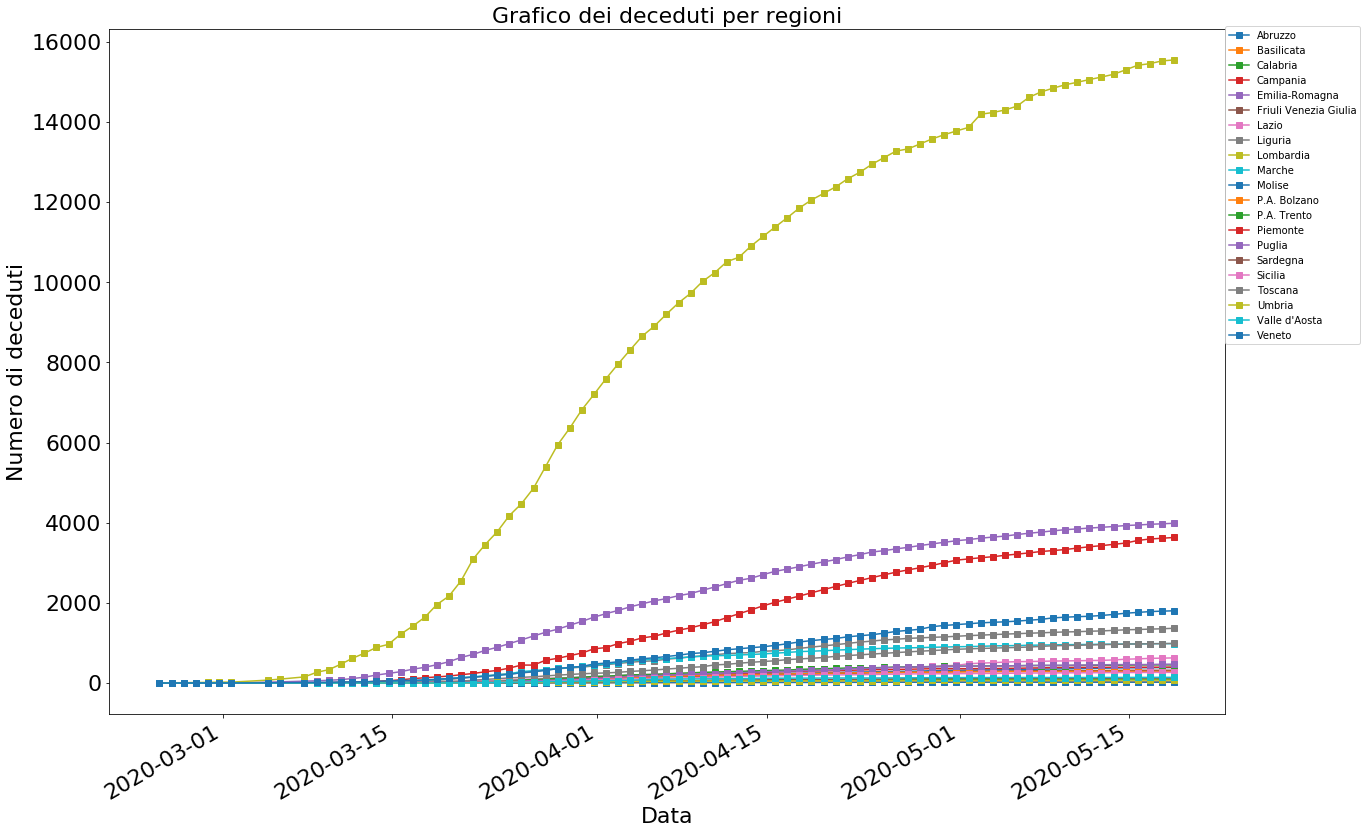

In [17]:
decedutiPerRegioni = joinDF.pivot_table('deceduti', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
decedutiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico dei deceduti per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di deceduti', size = 22 )
plt.legend(loc=(1,0.54))

>*Quali sono state le regioni con più ricoverati?*

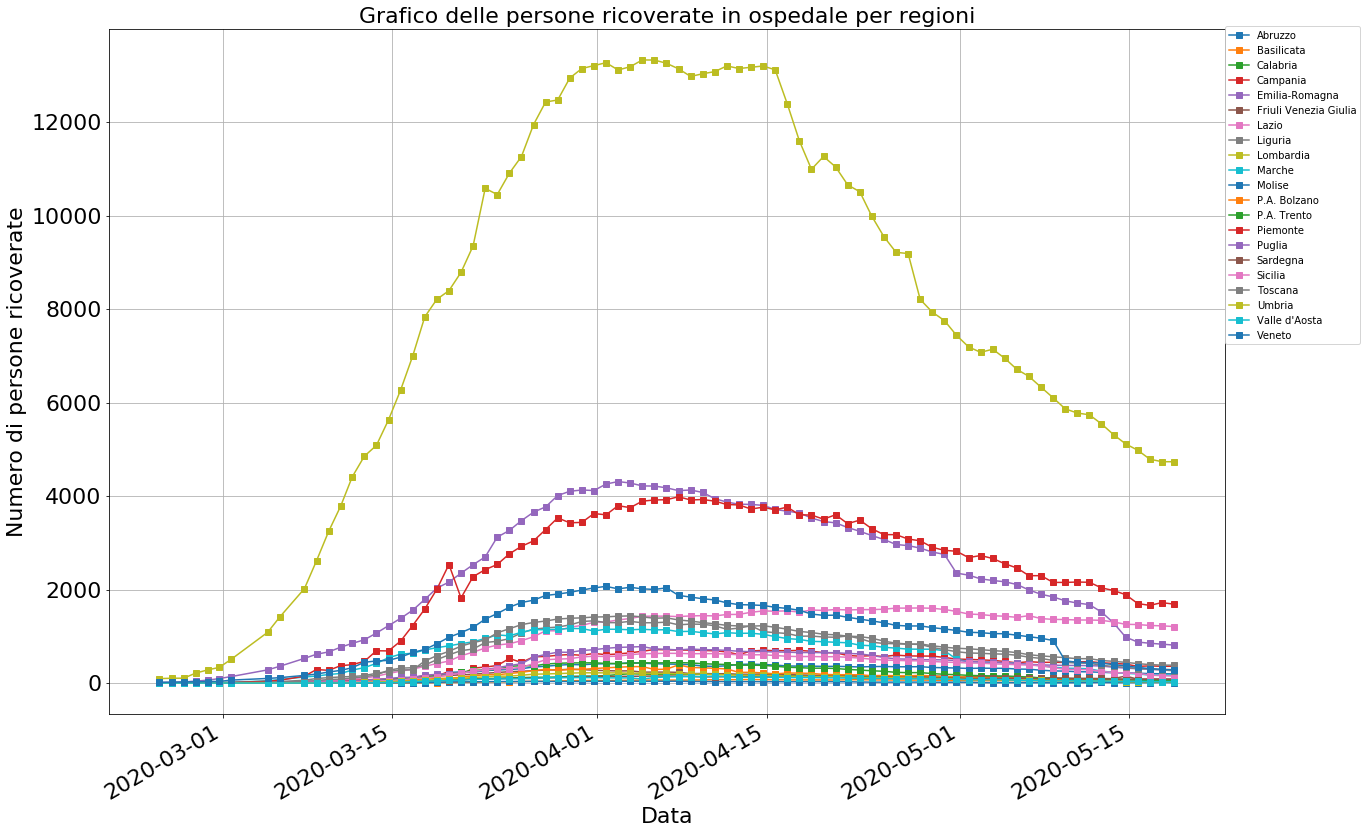

In [18]:
ospedalizzatiPerRegioni = joinDF.pivot_table(values = 'totale_ospedalizzati', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
ospedalizzatiPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

No handles with labels found to put in legend.


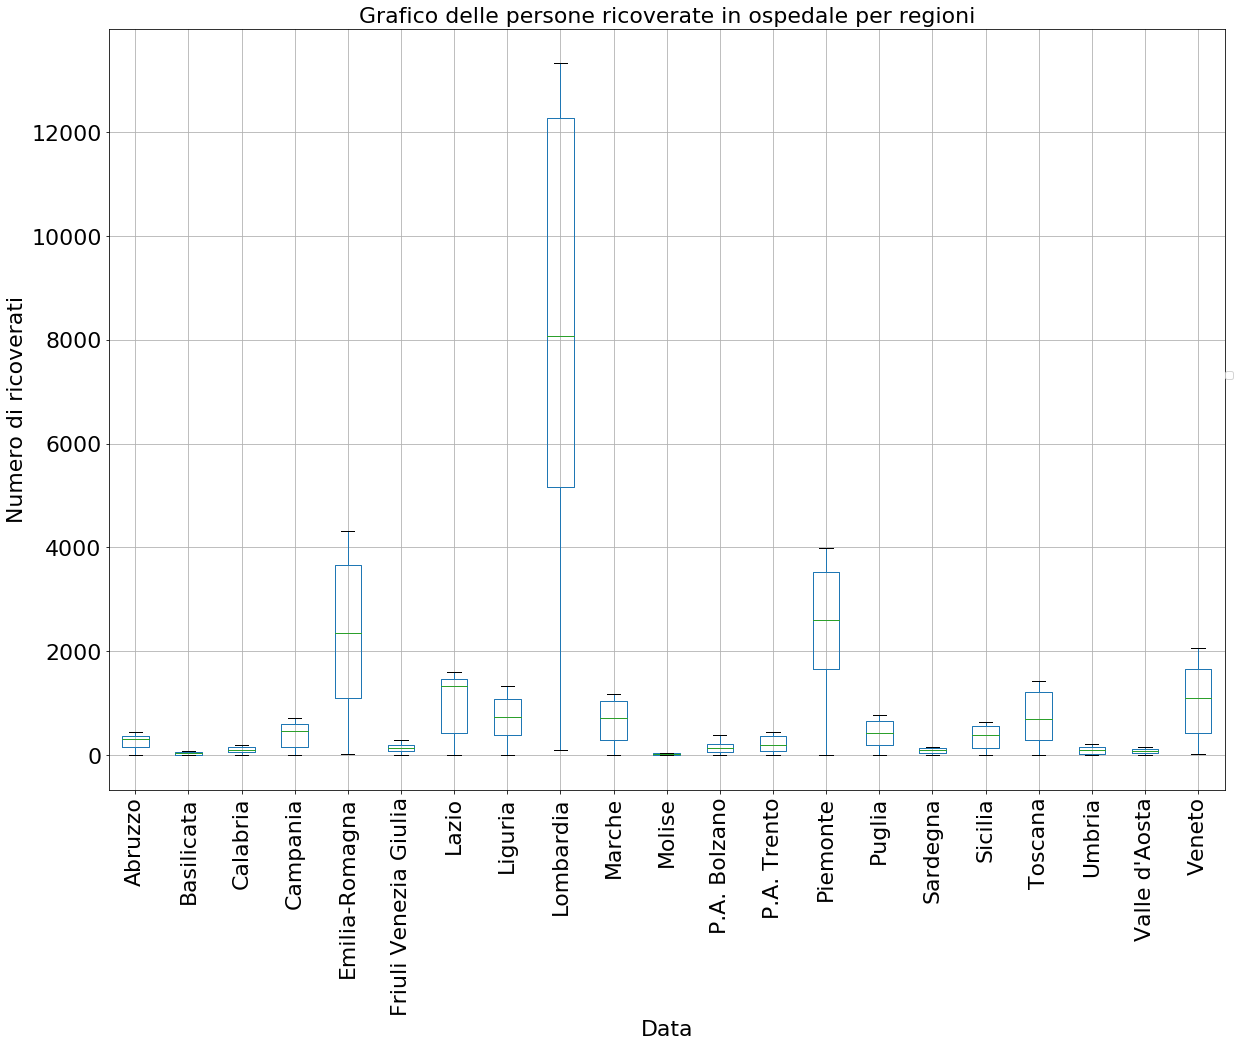

In [19]:
ospedalizzatiPerRegioni.boxplot(figsize=(20,14), fontsize=22)
plt.title('Grafico delle persone ricoverate in ospedale per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.xticks(rotation=90)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.legend(loc=(1,0.54))

>*Quanto è costata alla regione curare un malato covid in terapia intensiva?*

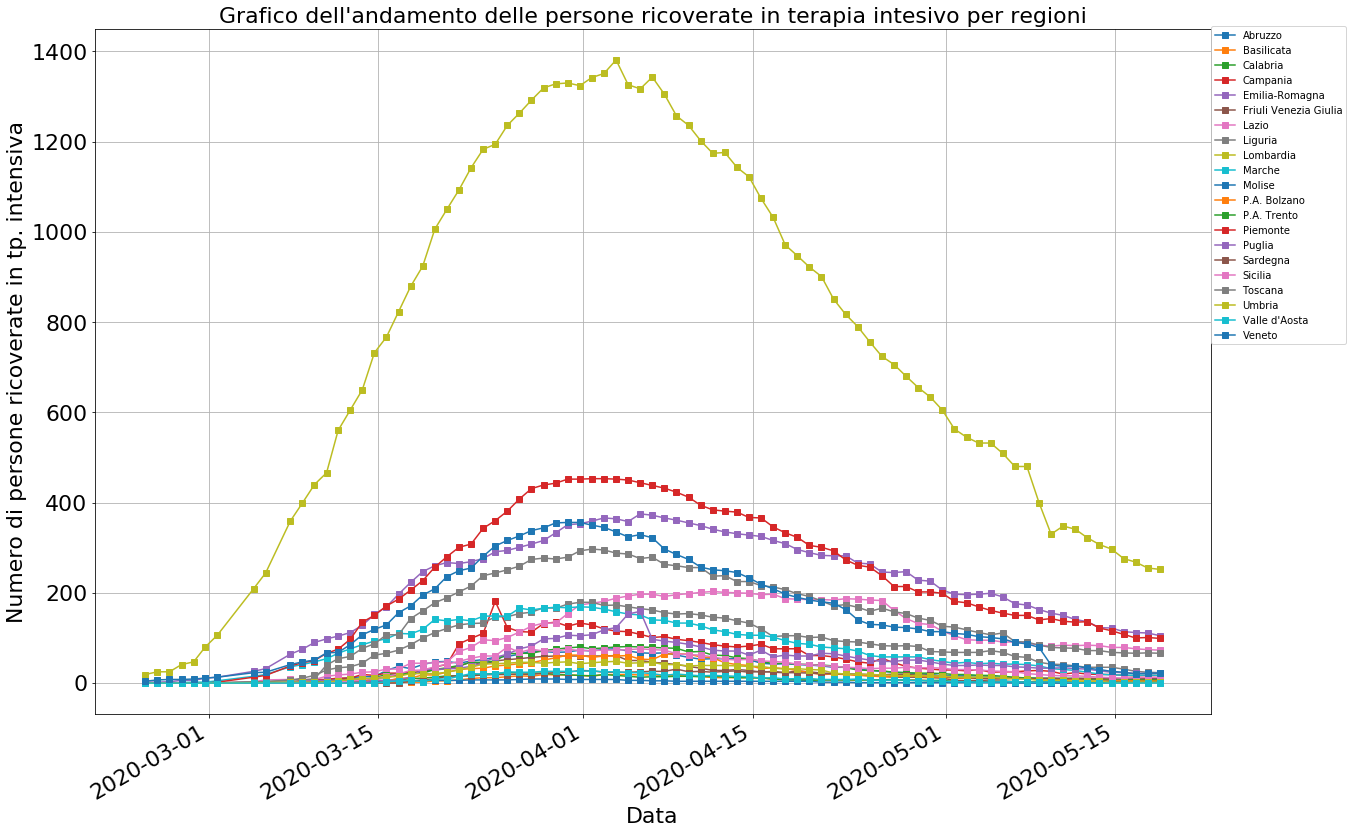

In [21]:
terapiaIntsPerRegioni = joinDF.pivot_table(values = 'terapia_intensiva', index=['data'], columns=['denominazione_regione'], aggfunc='max' )
terapiaIntsPerRegioni.plot(figsize=(20,14), marker='s', fontsize=22)
plt.title("Grafico dell'andamento delle persone ricoverate in terapia intesivo per regioni", size = 22)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate in tp. intensiva', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

No handles with labels found to put in legend.


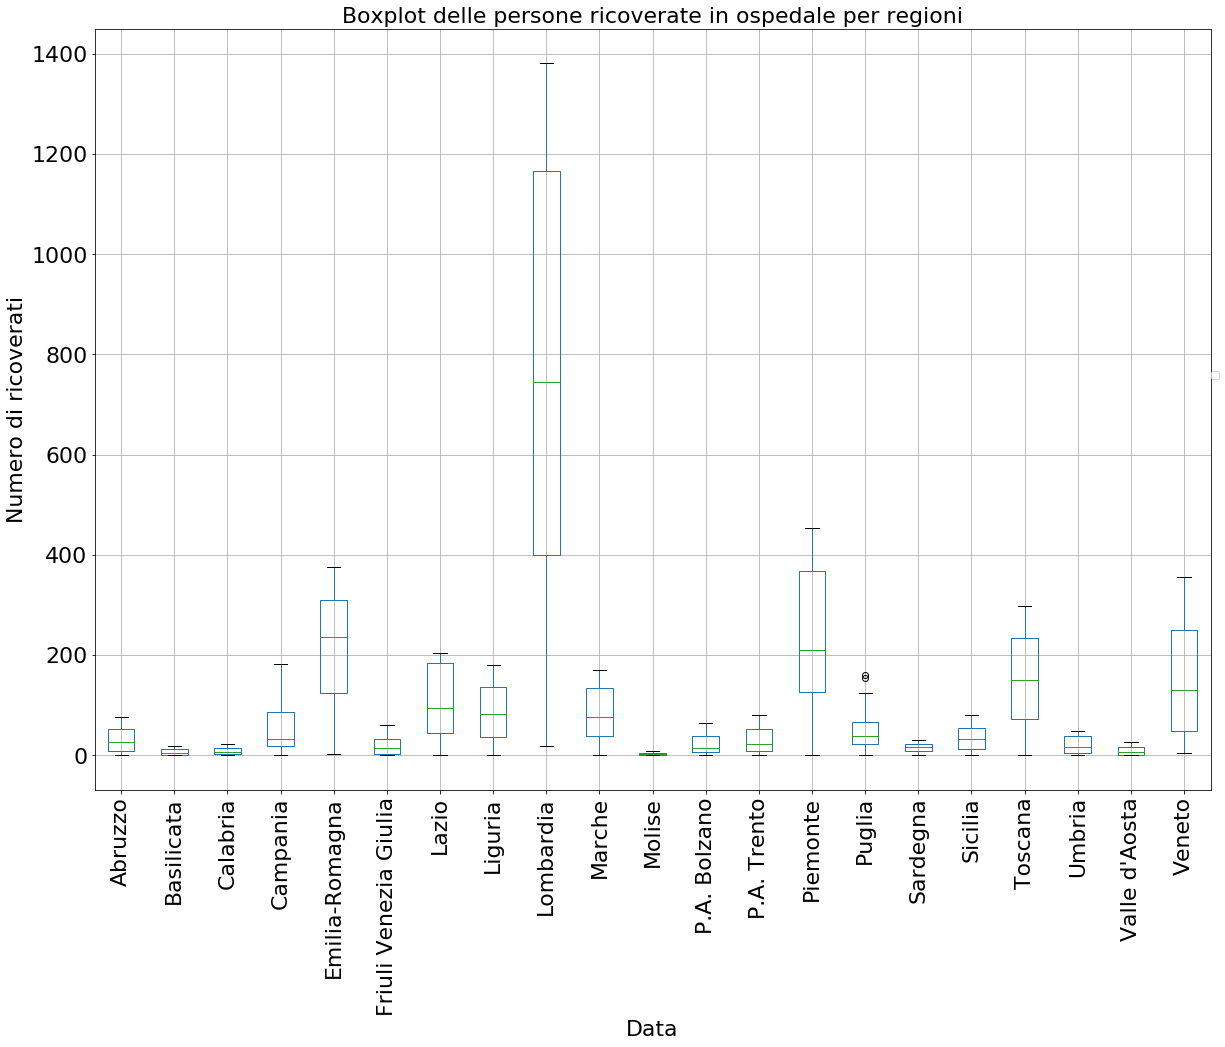

In [24]:
terapiaIntsPerRegioni.boxplot(figsize=(20,14), fontsize=22)
plt.title('Boxplot delle persone ricoverate in terapia intensiva per regioni', size = 22)
plt.xlabel('Data',size = 22)
plt.xticks(rotation=90)
plt.ylabel('Numero di ricoverati', size = 22 )
plt.legend(loc=(1,0.54))

Text(0, 0.5, 'Regioni')

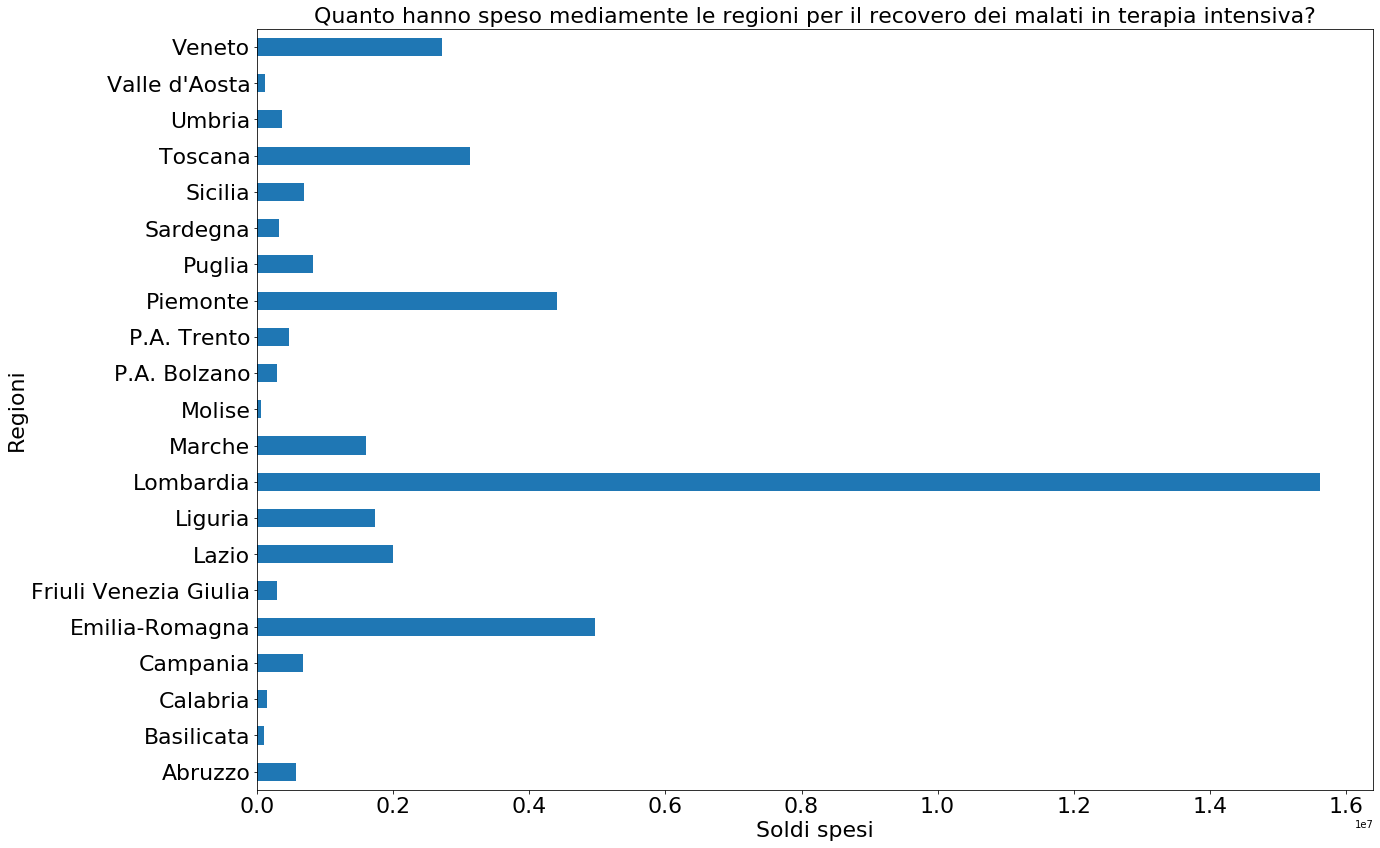

In [29]:
costi_medi_terapia_intensiva=terapiaIntsPerRegioni.median()*1500*14
costi_medi_terapia_intensiva.plot(kind='barh', figsize=(20,14))
plt.title('Quanto hanno speso mediamente le regioni per il recovero dei malati in terapia intensiva?', size = 22)
plt.xlabel('Soldi spesi',size = 22)
plt.xticks(size=22)
plt.yticks(size=22)
plt.ylabel('Regioni', size = 22 )

>*Quanto è costato allo stato curare un malato covid in terapia intensiva?*

In [32]:
np.sum(costi_medi_terapia_intensiva)

41044500.0

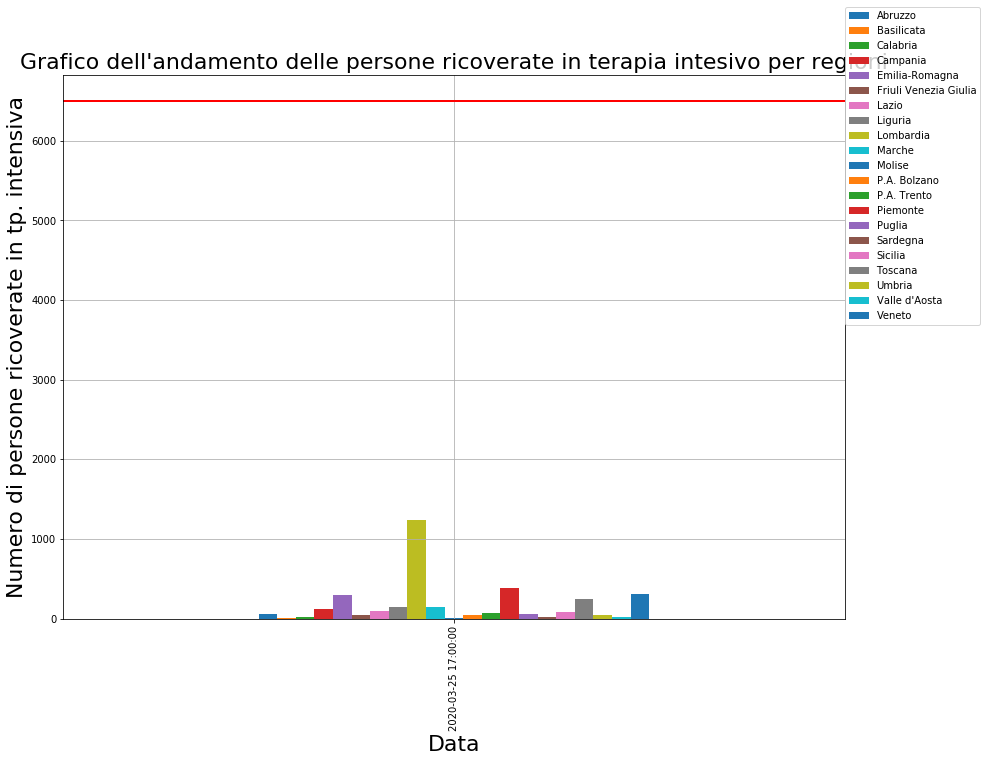

In [22]:
terapiaIntsPerRegioni['2020-03-25'].plot(kind='bar', figsize=(14,10))
plt.title("Grafico dell'andamento delle persone ricoverate in terapia intesiva per regioni", size = 22)
plt.axhline(y=6500,  color='red', lw = 2)
plt.xlabel('Data',size = 22)
plt.ylabel('Numero di persone ricoverate in tp. intensiva', size = 22 )
plt.legend(loc=(1,0.54))
plt.grid()

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
titanic[titanic['sex']=='male']['survived'].mean()

In [ ]:
titanic.groupby('sex')[['survived']].mean()

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack() # calcolo la media dei sopravissuti per ogni classe divisa tra maschi e femminie

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class') #calcola la media dei sopravissuti per ogni classe divisi per maschi e femmini di età 0, 18 e 18,80